In [1]:
# import segmentation_models as sm
from sklearn.model_selection import train_test_split

from brainseg.generator import TrainGenerator, TestGenerator
from brainseg.loader import Loader
from brainseg.utils import load_data, show_batch
from brainseg.slide_provider import SlideHandler
from brainseg.provider import provider

import matplotlib.pyplot as plt
import numpy as np

# sm.set_framework("tf.keras")

2022-05-18 11:33:51.881157: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-18 11:33:51.881184: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
dataset = load_data("data/dataset/tinyset.pck")

In [3]:
sh = SlideHandler("/media/nathan/LaCie/M148_RH/", "/media/nathan/KINGSTON/BrainMapping/filled_masks_148/")
provider.register(sh)

In [4]:
def preprocess(x, y):
    x = x / 255.
    y = y.astype(np.float64)[:, :, :1]
    return x, y

In [5]:
train_dataset, test_dataset = train_test_split(dataset, random_state=0)

In [6]:
train_gen = TrainGenerator(Loader(train_dataset), batch_size=4, preprocess=preprocess)
test_gen = TestGenerator(Loader(train_dataset), batch_size=4, preprocess=preprocess)

## Generator validation

unique debug [1] [  0 255] [1.] [255]
unique debug [0 1] [  0 255] [0.00000000e+00 3.56834773e-11 4.36131390e-11 5.94724622e-11
 8.09958295e-11 9.00583000e-11 1.03652006e-10 1.25930579e-10
 1.38769079e-10 2.79237370e-10 2.90187855e-10 3.10956017e-10
 3.12088826e-10 3.21151296e-10 4.10265589e-10 3.06392599e-09
 7.33502457e-09 9.10773556e-09 1.18430362e-08 1.37648206e-08
 1.99059755e-08 2.20751324e-08 2.30017380e-08 3.24360620e-08
 4.35209060e-08 5.58314563e-08 5.93843470e-08 8.13896219e-08
 8.81550342e-08 1.06585968e-07 1.20192687e-07 1.39341828e-07
 1.40542010e-07 1.42738356e-07 1.55209860e-07 5.42984508e-07
 5.62004580e-07 6.09524144e-07 6.63647732e-07 7.97214069e-07
 9.39610459e-07 1.02542747e-06 1.19846500e-06 1.39058459e-06
 1.49217836e-06 1.63946752e-06 2.02815231e-06 2.70014675e-06
 2.76187622e-06 3.36842803e-06 3.62010190e-06 3.84604253e-06
 3.88329500e-06 3.89189953e-06 3.91061617e-06 3.93052090e-06
 4.10249725e-06 4.33452264e-06 4.45132242e-06 4.69631259e-06
 4.74624945e-06 4.

unique debug [0 1] [  0 255] [0.00000000e+00 1.88801467e-13 9.44007337e-13 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00] [  0 255]
unique debug [0 1] [  0 255] [0.00000000e+00 1.11392866e-11 1.86913453e-11 2.92642274e-11
 5.19204035e-11 5.60740358e-11 6.74021239e-11 1.10448858e-10
 1.18378520e-10 1.30839417e-10 1.58782034e-10 1.62558063e-10
 2.64888459e-10 2.90565458e-10 4.19705662e-10 4.62752397e-10
 4.70304455e-10 6.12660762e-10 4.59296697e-09 1.08382242e-08
 1.11711246e-08 1.77055113e-08 1.82997147e-08 2.38897909e-08
 3.97304233e-08 4.05452975e-08 4.29480009e-08 4.30886234e-08
 4.85652913e-08 5.60972888e-08 7.41167113e-08 7.90165967e-08
 8.29012533e-08 8.48058793e-08 1.05220369e-07 1.08581090e-07
 1.11627991e-07 1.20192687e-07 1.25231685e-07 1.27756506e-07
 1.29143000e-07 1.45695874e-07 1.57821483e-07 1.69141489e-07
 1.69907877e-07 5.30239431e-07 7.51516652e-07 7.68356038e-07
 1.53226206e-06 1.56070454e-06 1.90307428e-06 2.12980899e-06
 2.31135313e-06 2.41290802e-06 2.71165425e

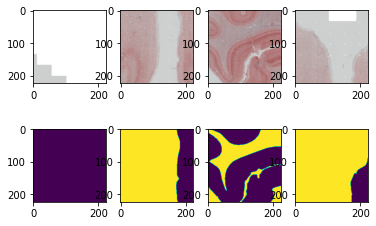

In [7]:
show_batch(train_gen[0])

# Model

In [8]:
model = sm.Unet(backbone_name='efficientnetb0', input_shape=(224, 224, 3), classes=1, encoder_weights='imagenet')
model.compile(
    'Adam',
    loss=sm.losses.bce_jaccard_loss,
    metrics=[sm.metrics.iou_score],
)

NameError: name 'sm' is not defined

In [ ]:
for i in range(10):
    model.fit(train_gen)
    model.evaluate(test_gen)

In [ ]:
preds = model.predict(test_gen)

In [ ]:
b = test_gen[0]

len(b[0])

show_batch((b[0], preds[:4]))

In [ ]:
def show_batch_thr(batch, thr=0.5):
    for i, (a, b) in enumerate(zip(*batch)):
        plt.subplot(2, len(batch[0]), 1 + i)
        plt.imshow(a)
        plt.subplot(2, len(batch[0]), 1 + i + len(batch[0]))
        plt.imshow(b > thr)

In [ ]:
show_batch_thr((b[0], preds[:4]), 0.3)